# Problem 3: Google Playstore Apps Dataset (63 points)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel('GooglePlaystore.xlsx')

### 1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [ ]:
print(df.shape)
df = df[df['Reviews']!='3.0M']
df.shape

### 2. [4 pts] Remove rows where any of the columns has the value "Varies with device".

In [ ]:
for col in df.columns:
    if df[col].dtype != float:
        df = df[df[col]!= 'Varies with device']
        print(col, '-->', df.shape)
df.shape

### 3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".

In [ ]:
import re
df['Android Ver'] = df['Android Ver'].apply(lambda x: re.findall('[0-9.]+',str(x)))
df['Android Ver']

In [ ]:
df['avt'] = df['Android Ver'].apply(lambda x: len(x))
df['avt'].value_counts()
df = df[df['avt']>0] # remove two rows with Android value as Nan
df['Android Ver'] = df['Android Ver'].apply(lambda x: x[0][:3])
df['Android Ver']

### 4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [ ]:
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '').str.strip()
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df['Installs']

In [ ]:
print(df.columns)
df.shape

### 5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [ ]:
# df['Rating'].fillna('nan',inplace=True)
dftmp = df[ (df['Installs']<50000)&(df['Reviews']<100)]
dft = dftmp[dftmp['Rating'].isna()==True]
print(df.shape, dft.shape, dftmp.shape)
#9057, 15) (1374, 15) (3237, 15)
df.drop(labels=dft.index, inplace=True)

values = df.groupby('Category')['Rating'].mean()
dfs  = []
for cat in df['Category'].unique():
    dft = df[df['Category']==cat]
    dft['Rating'].fillna(round(values[cat],2), inplace=True)
    dfs.append(dft)
df = pd.concat(dfs)
df['Rating']

### 6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.


In [ ]:
df['Size'] = df['Size'].str.replace('M', '*1000000').str.replace('K', '*1000').str.replace('k', '*1000')
df['Size'] = df['Size'].apply(lambda x: eval(str(x)))
df['Size']

## Analysis (19 pts))

### 1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [ ]:
for cat in df['Category'].unique():
    print(cat)
    print('-'*80)
    print(df[df['Category']==cat]['Rating'].describe())
    print('='*80)

### 2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns: <br /> <br /> a. Rating (gives top 3 most highly rated applications in each category) <br /> b. Installs (gives top 3 most installed applications in each category)<br />c. Reviews (gives top 3 most reviewed applications in each category

In [40]:
dff = df[df['Type']=='Free']
dff.shape

(7110, 14)

In [50]:
col='Rating'
def get_top_three(col):
    res = []
    for cat in dff['Category'].unique():
        dft = dff[dff['Category']==cat]
        dft.sort_values(col, ascending=False, inplace=True)
        res.append(dft.iloc[:3, :])
    res = pd.concat(res)
    res = res[['Category', 'App', col]]
    return res

df_rating = get_top_three('Rating')
df_rating.head(10)
# df_install = get_top_three('Installs')
# df_install.head(10)
# df_review = get_top_three('Reviews')
# df_review.head(10)

<ipython-input-50-f400722ca904>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft.sort_values(col, ascending=False, inplace=True)


,Category,App,Rating
8888,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
6930,ART_AND_DESIGN,Fantasy theme dark bw black building,4.8
3982,ART_AND_DESIGN,Cardi B Wallpaper,4.8
64,AUTO_AND_VEHICLES,DMV Permit Practice Test 2018 Edition,4.9
79,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,4.9
55,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
99,BEAUTY,"ipsy: Makeup, Beauty, and Tips",4.9
108,BEAUTY,Prom MakeUp Tutorial,4.8
98,BEAUTY,Hush - Beauty for Everyone,4.7
8146,BOOKS_AND_REFERENCE,CZ-Help,5.0


### 3. [4 pts] Find the average, maximum and minimum price of the paid applications.

In [51]:
dfp = df[df['Type']=='Paid']
print('Average: ', dfp['Price'].mean())
print('Maximun: ', dfp['Price'].max())
print('Minimum: ', dfp['Price'].min())

Average:  15.162984293193535
Maximun:  400
Minimum:  0.99


## Visualization (16 pts)

### 1. [9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].<br />Count the number of applications per genre and display it using a pie chart.

In [54]:
df['Genres'] = df['Genres'].str.split(';')

In [55]:
df['Genres']

0             [Art & Design]
1             [Art & Design]
1             [Pretend Play]
2             [Art & Design]
4             [Art & Design]
                ...         
9958     [Maps & Navigation]
9967     [Maps & Navigation]
10638    [Maps & Navigation]
10737    [Maps & Navigation]
10755    [Maps & Navigation]
Name: Genres, Length: 8098, dtype: object

<AxesSubplot:ylabel='Genres'>

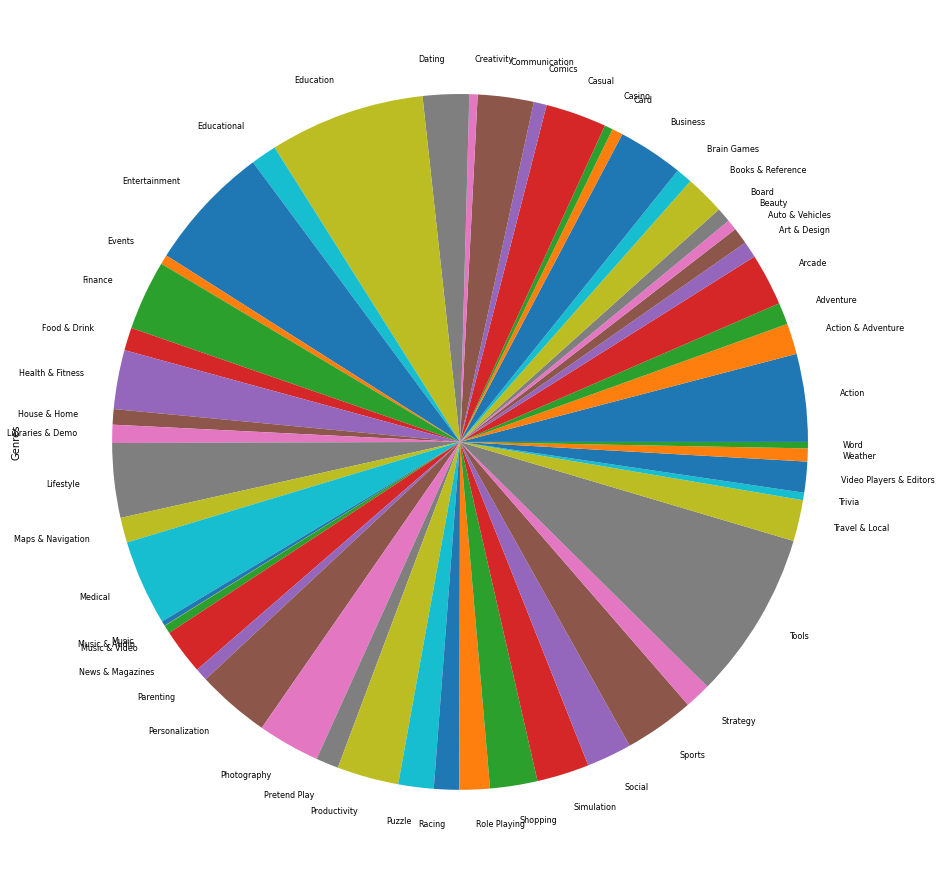

In [56]:
df = df.explode('Genres')
dfn = df.groupby('Genres')['Genres'].count()
dfn.plot.pie(figsize=(16, 16), fontsize=8)

### 2. [7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

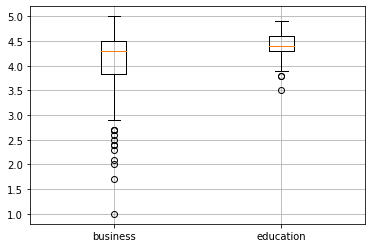

In [57]:
plt.boxplot([df[df['Category']=='BUSINESS']['Rating'],df[df['Category']=='EDUCATION']['Rating']], labels=['business', 'education'] )
plt.grid()
plt.show()
#df[df['Category']=='EDUCATION']['Rating'].plot.box(x='Business')

In [58]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)